In [4]:
import os
import datetime
import tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
mpl.rcParams['figure.figsize'] = (10, 6)
mpl.rcParams['axes.grid'] = False

In [6]:
def is_gzip_file(filepath):
    with open(filepath, 'rb') as f:
        return f.read(2) == b'\x1f\x8b'
def display_all(df):
    plot_cols = df.columns
    plot_features = df[plot_cols]
    plot_features.index = df.index
    _ = plot_features.plot(subplots=True)

    plot_features = df[plot_cols][:960]
    plot_features.index = df.index[:960]
    _ = plot_features.plot(subplots=True)

In [7]:
csv_path = '/Users/watcharinsarachai/workpaces/PhotovoltaicHA/dataset/utci_selected_timeseries.csv'

In [14]:
csv_path = tf.keras.utils.get_file(
    origin='https://itsci.mju.ac.th/downloads/watcharin/datasets/pv/sis_selected_timeseries.csv.tar.gz')
    #origin='https://itsci.mju.ac.th/downloads/watcharin/datasets/pv/utci_selected_timeseries.csv.tar.gz')
    #origin='https://itsci.mju.ac.th/downloads/watcharin/datasets/pv/era5_hourly_data.csv.tar.gz')
    #origin='https://itsci.mju.ac.th/downloads/watcharin/datasets/pv/era5_land_hourly.csv.tar.gz')
csv_path

285418/285418 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


'/Users/watcharinsarachai/.keras/datasets/utci_selected_timeseries.csv.tar.gz'

In [8]:
if is_gzip_file(csv_path):
  # Read the data directly into a pandas DataFrame
  df = pd.read_csv(csv_path, compression='gzip')
else:
  # Read the data without compression
  df = pd.read_csv(csv_path)
df = df.rename(columns={df.columns[0]: 'datetime'})
row_count = df.shape[0]
print(f"Total rows: {row_count}")
df.head(5)

Total rows: 110760


,datetime,utci_mean
0,2019-07-13T00:00:00,300.286072
1,2019-07-13T01:00:00,301.789551
2,2019-07-13T02:00:00,303.861420
3,2019-07-13T03:00:00,304.938293
4,2019-07-13T04:00:00,305.234680


In [9]:
df['datetime'] = pd.to_datetime(df['datetime'])
df = df.sort_values('datetime').reset_index(drop=True)

In [10]:
# Convert 'timestamp' column to datetime
df = df.set_index('datetime')

print(df.index.year.unique())
print(df.index.year.value_counts())

Index([2019, 2020, 2021, 2022, 2023, 2024, 2025], dtype='int32', name='datetime')
datetime
2020    17568
2024    17568
2021    17520
2022    17520
2023    17520
2019    12888
2025    10176
Name: count, dtype: int64


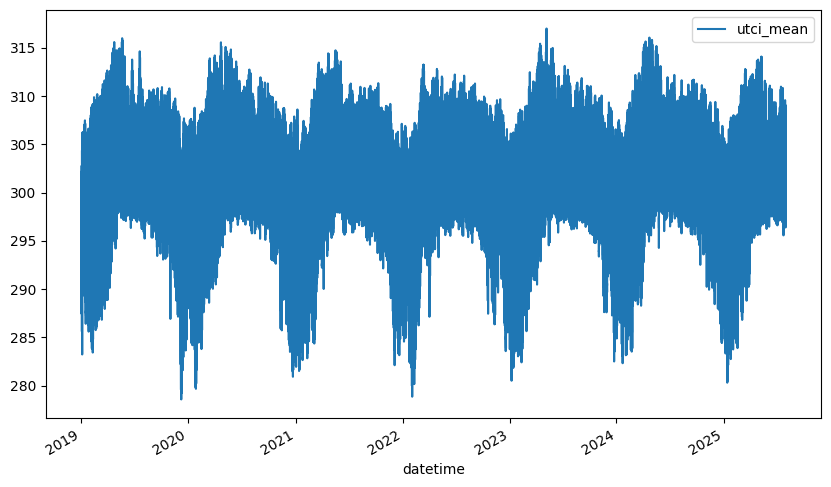

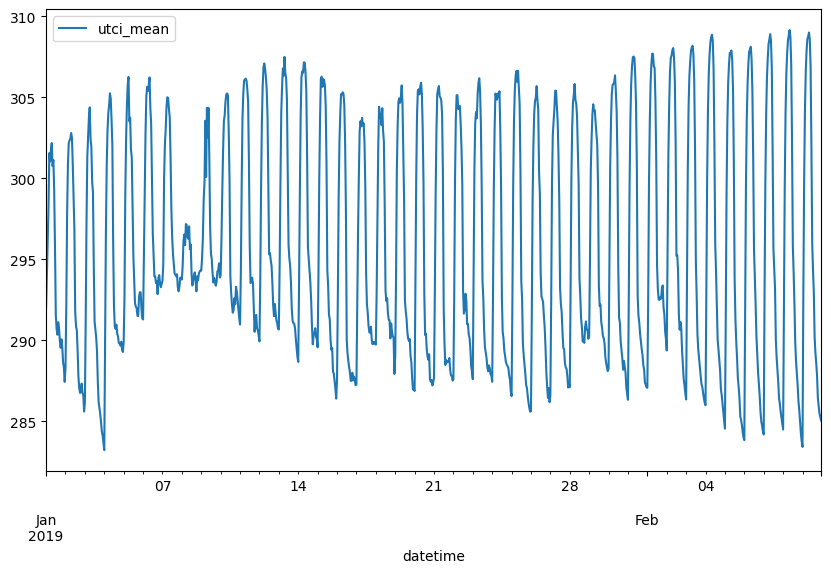

In [11]:
display_all(df)